# Red neuronal con Regla de Oja

### Entrenamiento

In [1]:
import numpy as np
import pandas as pd
from get_data import data, raw_data
from Neuron import Neuron
from utils import * 

def update_weigth(eta, s, weights, j):
    return weights + eta * s * (data[j] - s * weights)

def activation(weights, j):
    s = 0
    for i in range(len(data[j])):
        s += data[j][i] * weights[i]
    return s

epochs = 5000
eta = 0.0001

N = len(data)
weight = np.random.uniform(-1, 1, len(data[0]))
w = []
w.append(weight)
for i in range(0, epochs):
    for j in range(0, N):
        s = activation(weight, j)
        weight = update_weigth(eta, s, weight, j)
        w.append(weight)

eigenvector = w[-1]
print("Autovector: ", eigenvector)

first_component = np.matmul(data, w[-1])

df = pd.DataFrame(data = first_component)
final_df = pd.concat([raw_data[['Country']], df], axis = 1)

print("Primera componente: ")
print(final_df)

Autovector:  [ 0.12558938 -0.50044306  0.40722235 -0.48302071  0.18751446 -0.47555222
  0.27130766]
Primera componente: 
           Country         0
0          Austria -1.081053
1          Belgium -0.681236
2         Bulgaria  2.609184
3          Croatia  1.267922
4   Czech Republic -0.167943
5          Denmark -0.955461
6          Estonia  2.487485
7          Finland -0.210024
8          Germany -0.591776
9           Greece  0.997554
10         Hungary  1.396678
11         Iceland -1.582190
12         Ireland -1.809285
13           Italy -0.852990
14          Latvia  2.306277
15       Lithuania  1.530107
16      Luxembourg -3.477819
17     Netherlands -1.840699
18          Norway -2.106530
19          Poland  1.472422
20        Portugal  0.525567
21        Slovakia  0.782941
22        Slovenia  0.065818
23           Spain -0.162975
24          Sweden -0.883856
25     Switzerland -3.282590
26         Ukraine  4.584994
27  United Kingdom -0.340521


### Visualización de la primer componente por pais

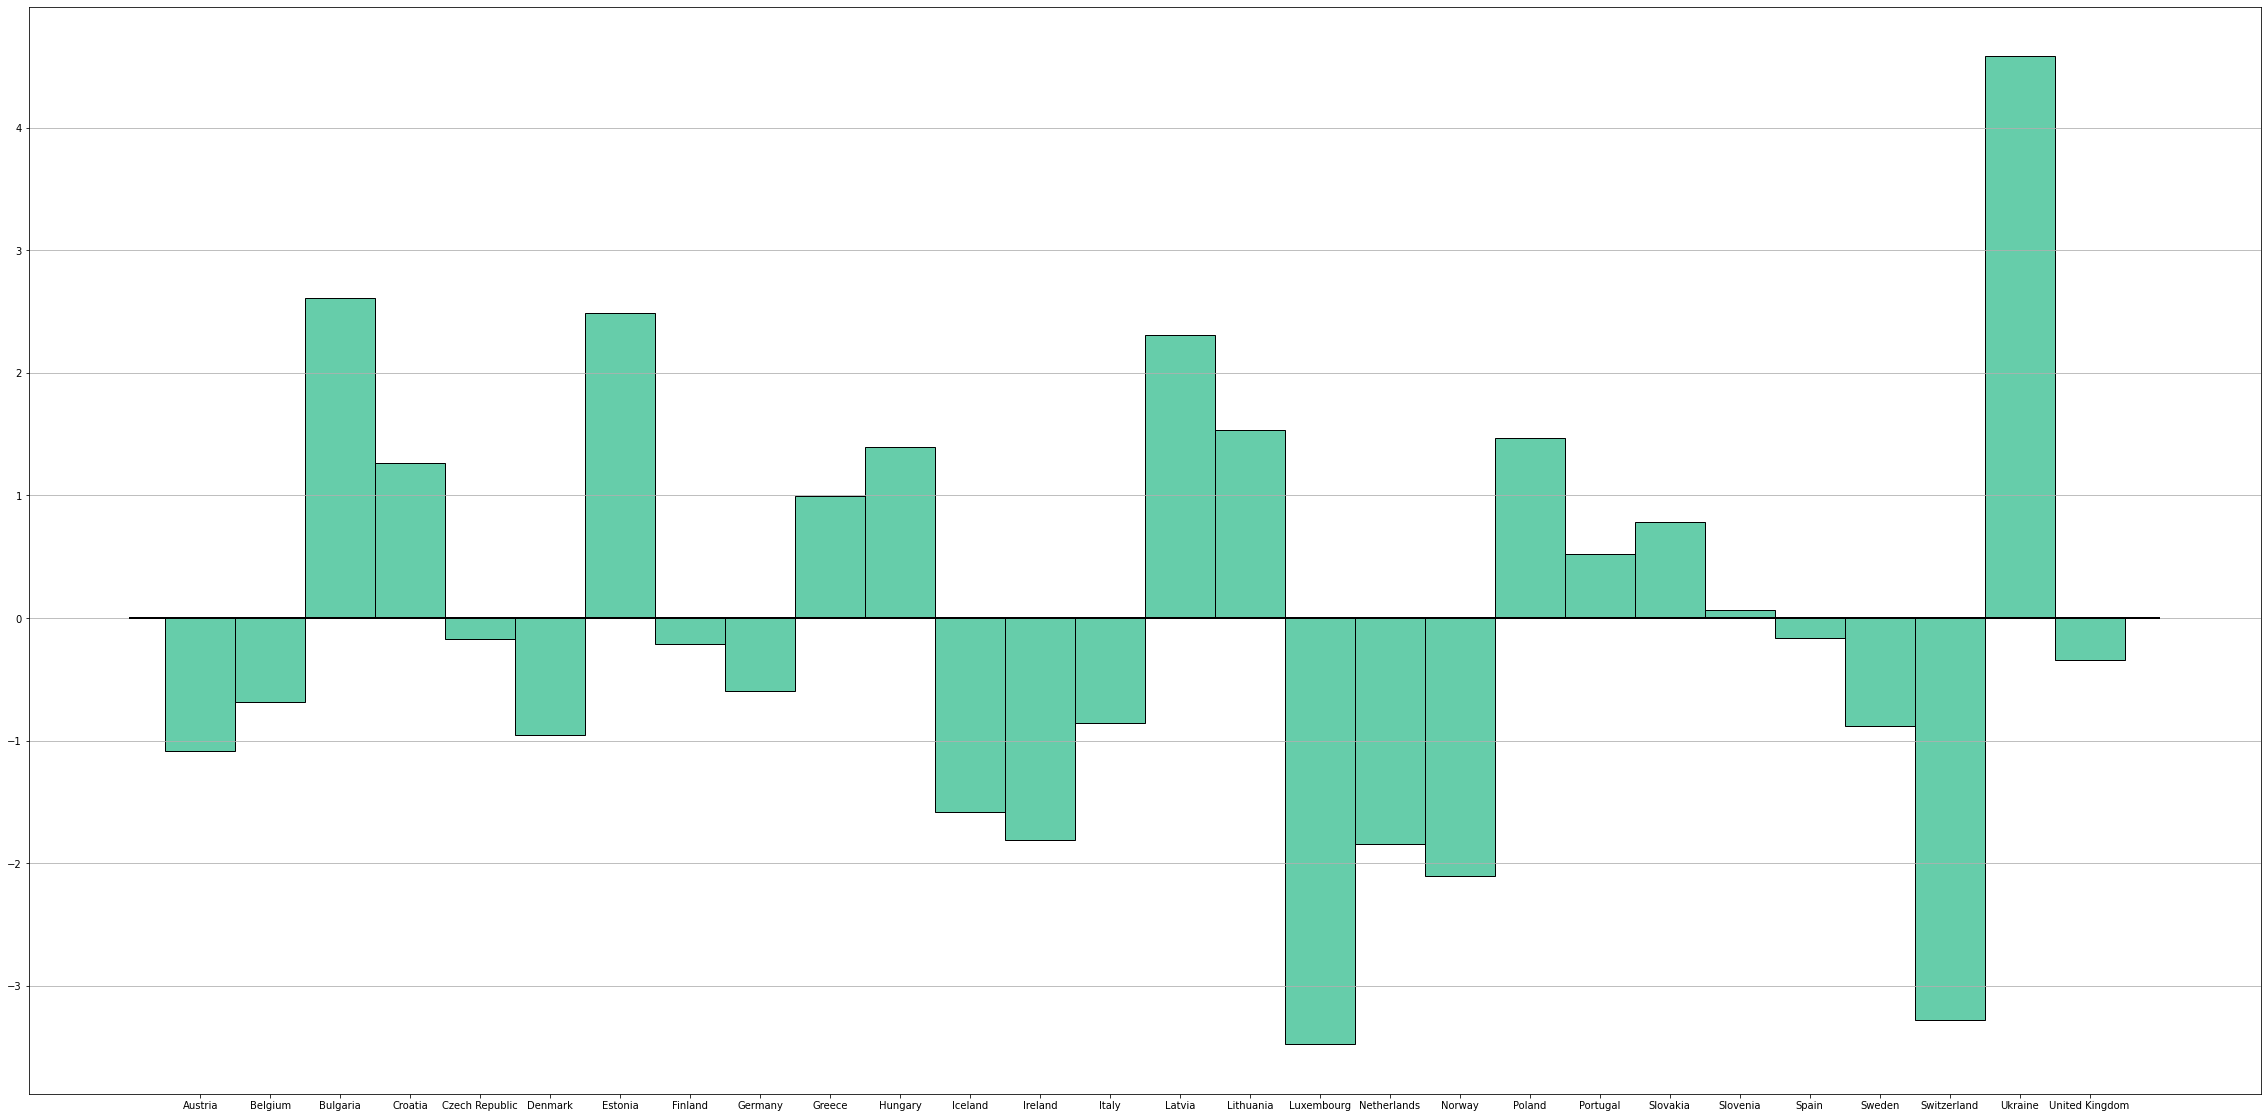

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labels = raw_data.values[:,0]

plt.figure(figsize=(40, 20)) 
plt.grid(axis='y')
plt.bar(labels,first_component, width=1, align='center', color='mediumaquamarine', edgecolor = 'black')
plt.plot(np.linspace(-1,28,num=28), np.zeros(len(first_component)), linewidth=2, color='black')
plt.show()

### Influencia de las variables

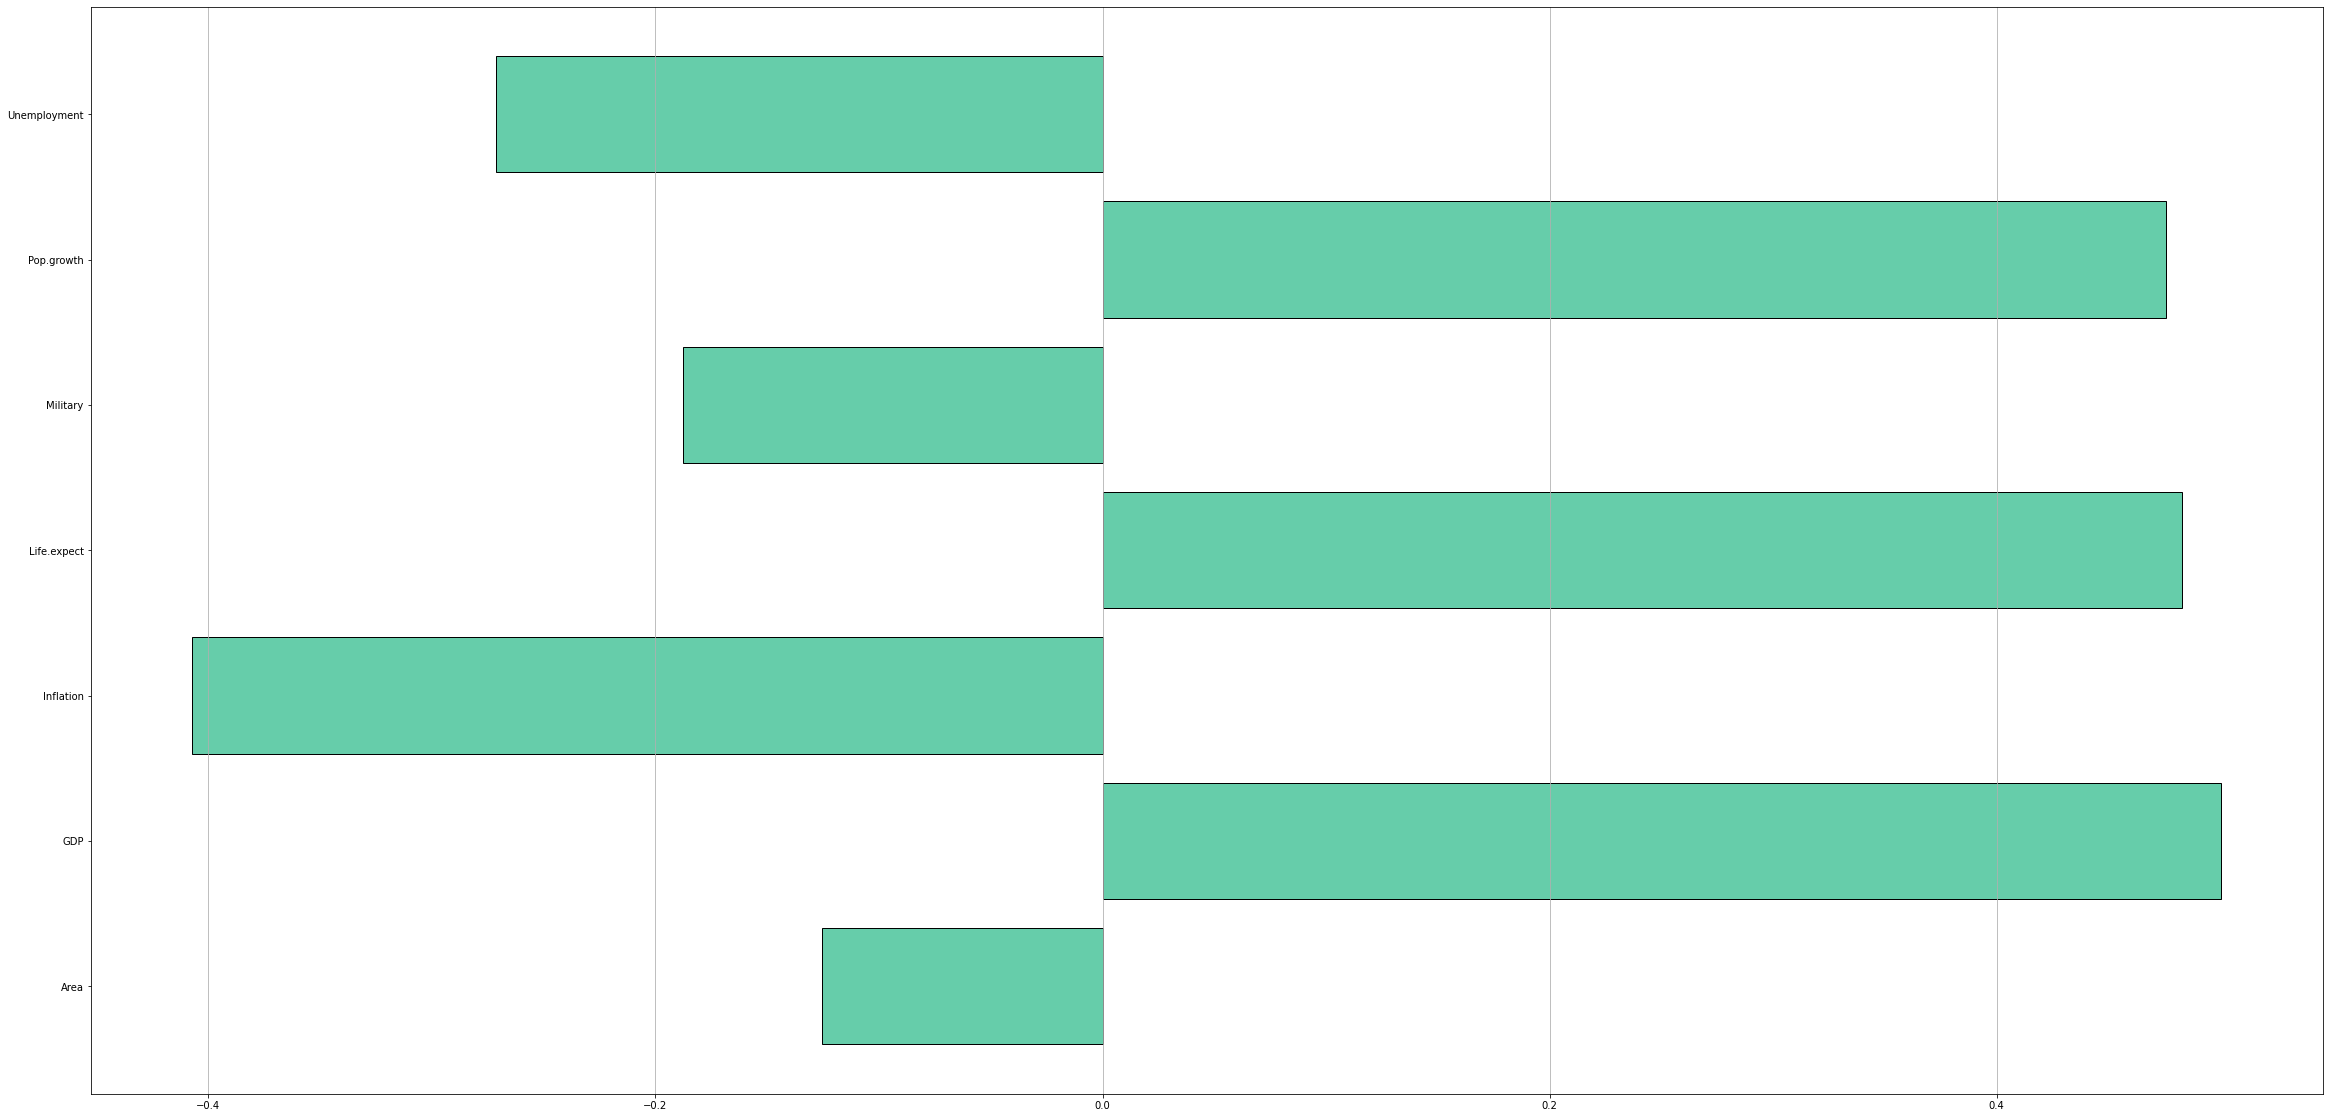

In [3]:
labels = raw_data.columns[1:]

eigenvector_transpose = np.array(eigenvector.T * -1)

plt.figure(figsize=(40, 20)) 
plt.grid(axis='x')
plt.barh(labels, eigenvector_transpose, align='center', color='mediumaquamarine', edgecolor = 'black')
plt.show()